## Observations and Insights 

In this clinical study we can see that Capomulin and Ramicane are the most effective drugs based off of this specific data set in treating tumor growth. Capomulin slightly edges out Ramicane in effectiveness based off of the bar plots provided below. 

The data provided was evenly distubuted across the male and female mice, with 50.6% being male and 49.4% being female.   

By taking a look at the scatter plot graph, we can see that the drug reponsiveness had a positive correlation to weight. The heavier the mice were the less effective the drugs were. Leading the mice studied to have a higher tumor volume in comparison to the lighter weighing mice.  

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
from scipy.stats import linregress
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID') 

# Display the data table for preview
mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [46]:
# Checking the number of mice.
mice_count = mouse_data["Mouse ID"].count()
mice_count 

1893

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_data[mouse_data.duplicated(['Mouse ID','Timepoint'])]
dup_mice 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [48]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = mouse_data[mouse_data.duplicated('Mouse ID')]
dup_mouse_id 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_data.drop_duplicates('Mouse ID')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [50]:
# Checking the number of mice in the clean DataFrame. 
clean_data = clean_data["Mouse ID"].count()
clean_data 

249

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats = mouse_data.groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_mean = summ_stats["Tumor Volume (mm3)"].mean()
tumor_med = summ_stats["Tumor Volume (mm3)"].median()
tumor_var = summ_stats["Tumor Volume (mm3)"].var()
tumor_sd = summ_stats["Tumor Volume (mm3)"].std()
tumor_sem = summ_stats["Tumor Volume (mm3)"].sem()



In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats_df = pd.DataFrame({"Mean": tumor_mean, 
                              "Median": tumor_med,
                              "Variance": tumor_var, 
                              "Std. Deviation": tumor_sd,
                              "SEM": tumor_sem
    
})
# Using the aggregation method, produce the same summary statistics in a single line
summ_stats_df

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Drug Treatments')

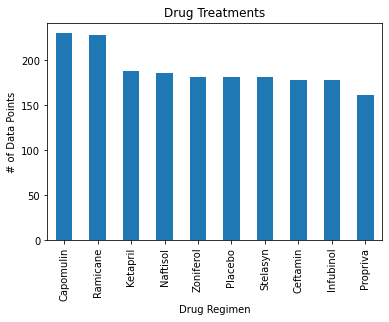

In [53]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_graph = mouse_data["Drug Regimen"].value_counts().plot.bar()

bar_graph.set_xlabel("Drug Regimen")
bar_graph.set_ylabel("# of Data Points")
bar_graph.set_title("Drug Treatments")

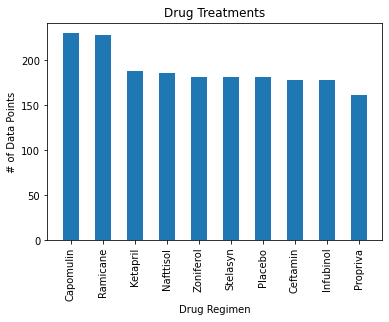

In [54]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

values = mouse_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(values))

plt.bar(x_axis, values, width = 0.5)
plt.title("Drug Treatments")
plt.xlabel("Drug Regimen")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           ['Capomulin', 'Ramicane', 'Ketapril', 'Nafttisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'])
plt.xticks(rotation=90)
plt.ylabel("# of Data Points")
plt.show()

Text(0, 0.5, ' ')

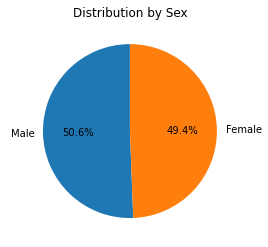

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_info = mouse_data["Sex"].value_counts()

pie_graph = pie_info.plot.pie(autopct="%1.1f%%", startangle=90)
pie_graph.set_title("Distribution by Sex")
pie_graph.set_ylabel(" ")

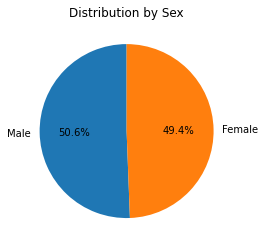

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_info = mouse_data["Sex"].value_counts()

plt.pie(pie_info, labels = pie_info.index.values, autopct="%1.1f%%", startangle=90)
plt.title("Distribution by Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tp_df = pd.DataFrame(mouse_data.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index()
tp_df 

merged_group = pd.merge(mouse_data, tp_df, on = "Mouse ID")
merged_group = merged_group.rename(columns = {'Timepoint_x': 'Timepoint', 
                                              'Timepoint_y': 'Timepoint Max'}, inplace = False)

merged_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Timepoint Max
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [65]:
# Put treatments into a list for for loop (and later for plot labels)

drugs_used = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drugs = [] 

# Create empty list to fill with tumor vol data (for plotting)
for drug in drugs_used: 
    drug_df = merged_group.loc[merged_group['Drug Regimen'] == drug]
    timepoint_df = merged_group.loc[merged_group['Timepoint'] == merged_group['Timepoint Max']]
    
    vol_val = timepoint_df["Tumor Volume (mm3)"]
    drugs.append(vol_val)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = values.quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    IQR = upper_q-lower_q
    
    print(f'IQR for {drug}: {IQR}')
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    lower_bound = lower_q - (1.5*IQR)
    upper_bound = upper_q + (1.5*IQR)
    
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # add subset 
    # Determine outliers using upper and lower bounds
    
    outliers_count = [x for x in vol_val if x <= lower_bound or x >= upper_bound]
    len(outliers_count)
    
    print(f'{drug} outliers: {outliers_count}') 

IQR for Capomulin: 8.75
Lower Bound for Capomulin: 165.625
Upper Bound for Capomulin: 200.625
Capomulin outliers: [22.05012627, 23.34359787, 28.48403281, 28.43096411, 29.12847181, 30.27623175, 30.48598484, 30.56462509, 30.63869575, 31.56046955, 31.02392294, 31.09533505, 31.896238399999998, 32.37735684, 33.32909778, 33.39765251, 34.45529799, 32.97852192, 33.56240217, 36.13485243, 37.31184577, 38.81036633, 36.04104736, 37.22565033, 37.07402422, 36.37451039, 36.56165229, 37.31123552, 38.84687569, 38.34200823, 38.93963263, 38.98287774, 38.75326548, 38.407618299999996, 38.125164399999996, 39.95234669, 40.65812366, 40.1592203, 40.72857787, 41.48300765, 41.58152074, 40.65900627, 40.66771292, 45.22086888, 43.04754260000001, 47.68596303, 43.41938077, 43.16637266, 44.18345092, 67.97341878, 65.52574285, 70.71762058, 62.99935619, 63.44068627, 66.79415599, 49.78341894, 60.12201052, 57.03186187, 66.08306589, 62.19141437, 60.41370908, 74.99776443, 72.25596306, 62.76509317, 55.74514628, 45.0, 56.05774

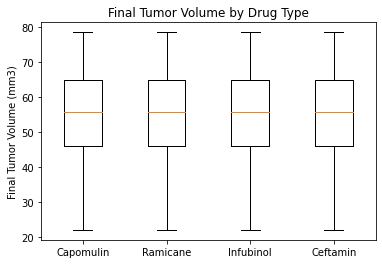

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

plt.boxplot(drugs, flierprops = flierprops)
plt.title("Final Tumor Volume by Drug Type")
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

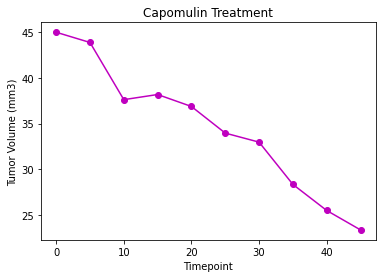

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_df = mouse_data.loc[mouse_data["Mouse ID"] == "s185"]

plt.plot(capo_df["Timepoint"], capo_df["Tumor Volume (mm3)"], marker = "o", color = "m")
plt.title("Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

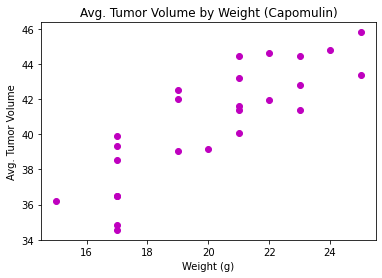

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capo_reg = mouse_data.loc[mouse_data["Drug Regimen"] == "Capomulin"]

mean_vol = pd.DataFrame(capo_reg.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().sort_values()).reset_index()
mean_vol = mean_vol.rename(columns ={"Tumor Volume (mm3)": "mean_vol"}, inplace = False)

capo_reg = pd.merge(capo_reg, mean_vol, on = "Mouse ID")
capo_reg_df = capo_reg[['Weight (g)', 'mean_vol']].drop_duplicates()
capo_reg_df

plt.scatter(capo_reg_df["Weight (g)"], capo_reg_df["mean_vol"], marker = "o", color = "m")
plt.title("Avg. Tumor Volume by Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume")

plt.show()

## Correlation and Regression

The correlation found between the Weight (g) and  Average Tumor Volume (mm3)
on the Capomulin Regimen is 0.84.


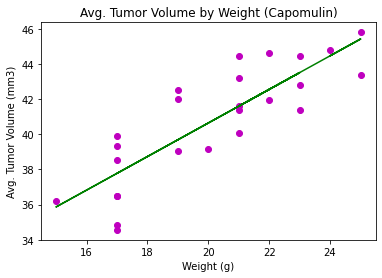

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capo_reg_df

corr_co = st.pearsonr(capo_reg_df["Weight (g)"], capo_reg_df["mean_vol"])
print(f"""The correlation found between the Weight (g) and  Average Tumor Volume (mm3)
on the Capomulin Regimen is {round(corr_co[0],2)}.""")

x = capo_reg_df["Weight (g)"]
y = capo_reg_df["mean_vol"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x, y, marker = "o", color = "m")
plt.plot(x,regress_values,"r-", color = "g")

plt.title("Avg. Tumor Volume by Weight (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")

plt.show() 